NSL-KDD is a data set suggested to solve some of the inherent problems of the KDD'99 data set. Although, this new version of the KDD data set still suffers from some of the problems discussed by McHugh and may not be a perfect representative of existing real networks, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods.

Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable.


[Dataset repo link](https://github.com/HoaNP/NSL-KDD-DataSet)

[Data Source](https://www.unb.ca/cic/datasets/nsl.html)

*(Notebook created by [Muhammad Amaan](https://www.linkedin.com/in/amaan-ai/) )*

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

In [24]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nsl-kdd/KDDTrain+.txt')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nsl-kdd/KDDTest+.txt')
print(train.shape)
test.shape

(125972, 43)


(22543, 43)

In [25]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [13]:
# changing column names to meaningful names to understand data properly
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

train.columns = columns
test.columns = columns

In [14]:
df = pd.concat([train, test], ignore_index=True)
df.shape

(148515, 43)

### Checking for missing values

In [15]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


no missing values found in any column of data.

## Attacks(target) Analysis

In [16]:
df['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

above array shows no. of unique attacks

In [17]:
# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        attack_type = 'dos'
    elif attack in probe_attacks:
        attack_type = 'probe'
    elif attack in privilege_attacks:
        attack_type = 'privilege'
    elif attack in access_attacks:
        attack_type = 'remote_access'
    else:
        attack_type = 'normal'

    return attack_type

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,dos
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,dos


all attacks are categoriezed in four attack types and one normal(no attack) in column `attack_map`

In [18]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level', 'attack_map'],
      dtype='object')

In [19]:
df.drop('attack', axis=1, inplace=True)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


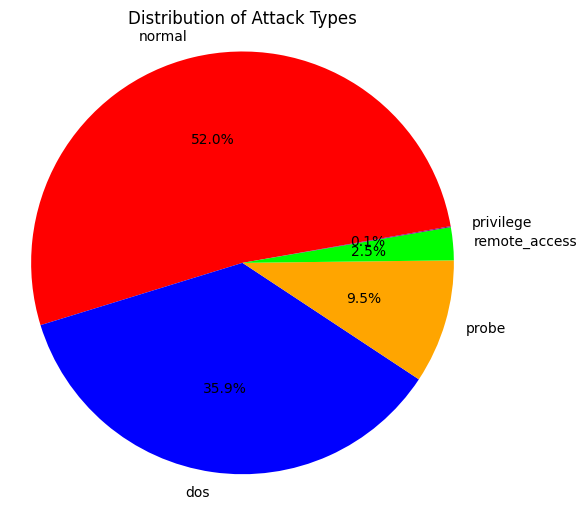

In [20]:
# list of CSS color names
css_colors = ["red", "blue", "orange", "lime", "purple"]
attack_counts = df['attack_map'].value_counts()

# Create the pie chart with CSS colors
plt.figure(figsize=(6, 6))
plt.pie(
    attack_counts,
    labels=attack_counts.index,
    autopct='%1.1f%%',
    startangle=10,
    colors=css_colors
)
plt.title('Distribution of Attack Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to store the original values
df_original = df.copy()

le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        # Store the original values for the column
        df_original[column + '_original'] = df[column]

        # Apply label encoding
        df[column] = le.fit_transform(df[column])

        # Display the before and after values
        print(f"Column: {column}")
        print("Before Label Encoding:")
        print(df_original[column + '_original'].unique())
        print("After Label Encoding:")
        print(df[column].unique())
        print("-" * 20)

Column: protocol_type
Before Label Encoding:
['udp' 'tcp' 'icmp']
After Label Encoding:
[2 1 0]
--------------------
Column: service
Before Label Encoding:
['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
After Label Encoding:
[44 49 24 51 20 36 38 14 35 60 18 12 58 67  2 54  7 66 37 65  4 11 19  5
 32 15 21 68 59 26 16 69 28 29 13 30 33 57 34 31 55 63 23 17 43 10 42  6
  8 56  9 53 40 47 41  0 46 48 62 45 50 39 52  1 64 27  

## Multicoolinearity Reduction

Multicollinearity is a statistical concept where several independent variables in a model are correlated.

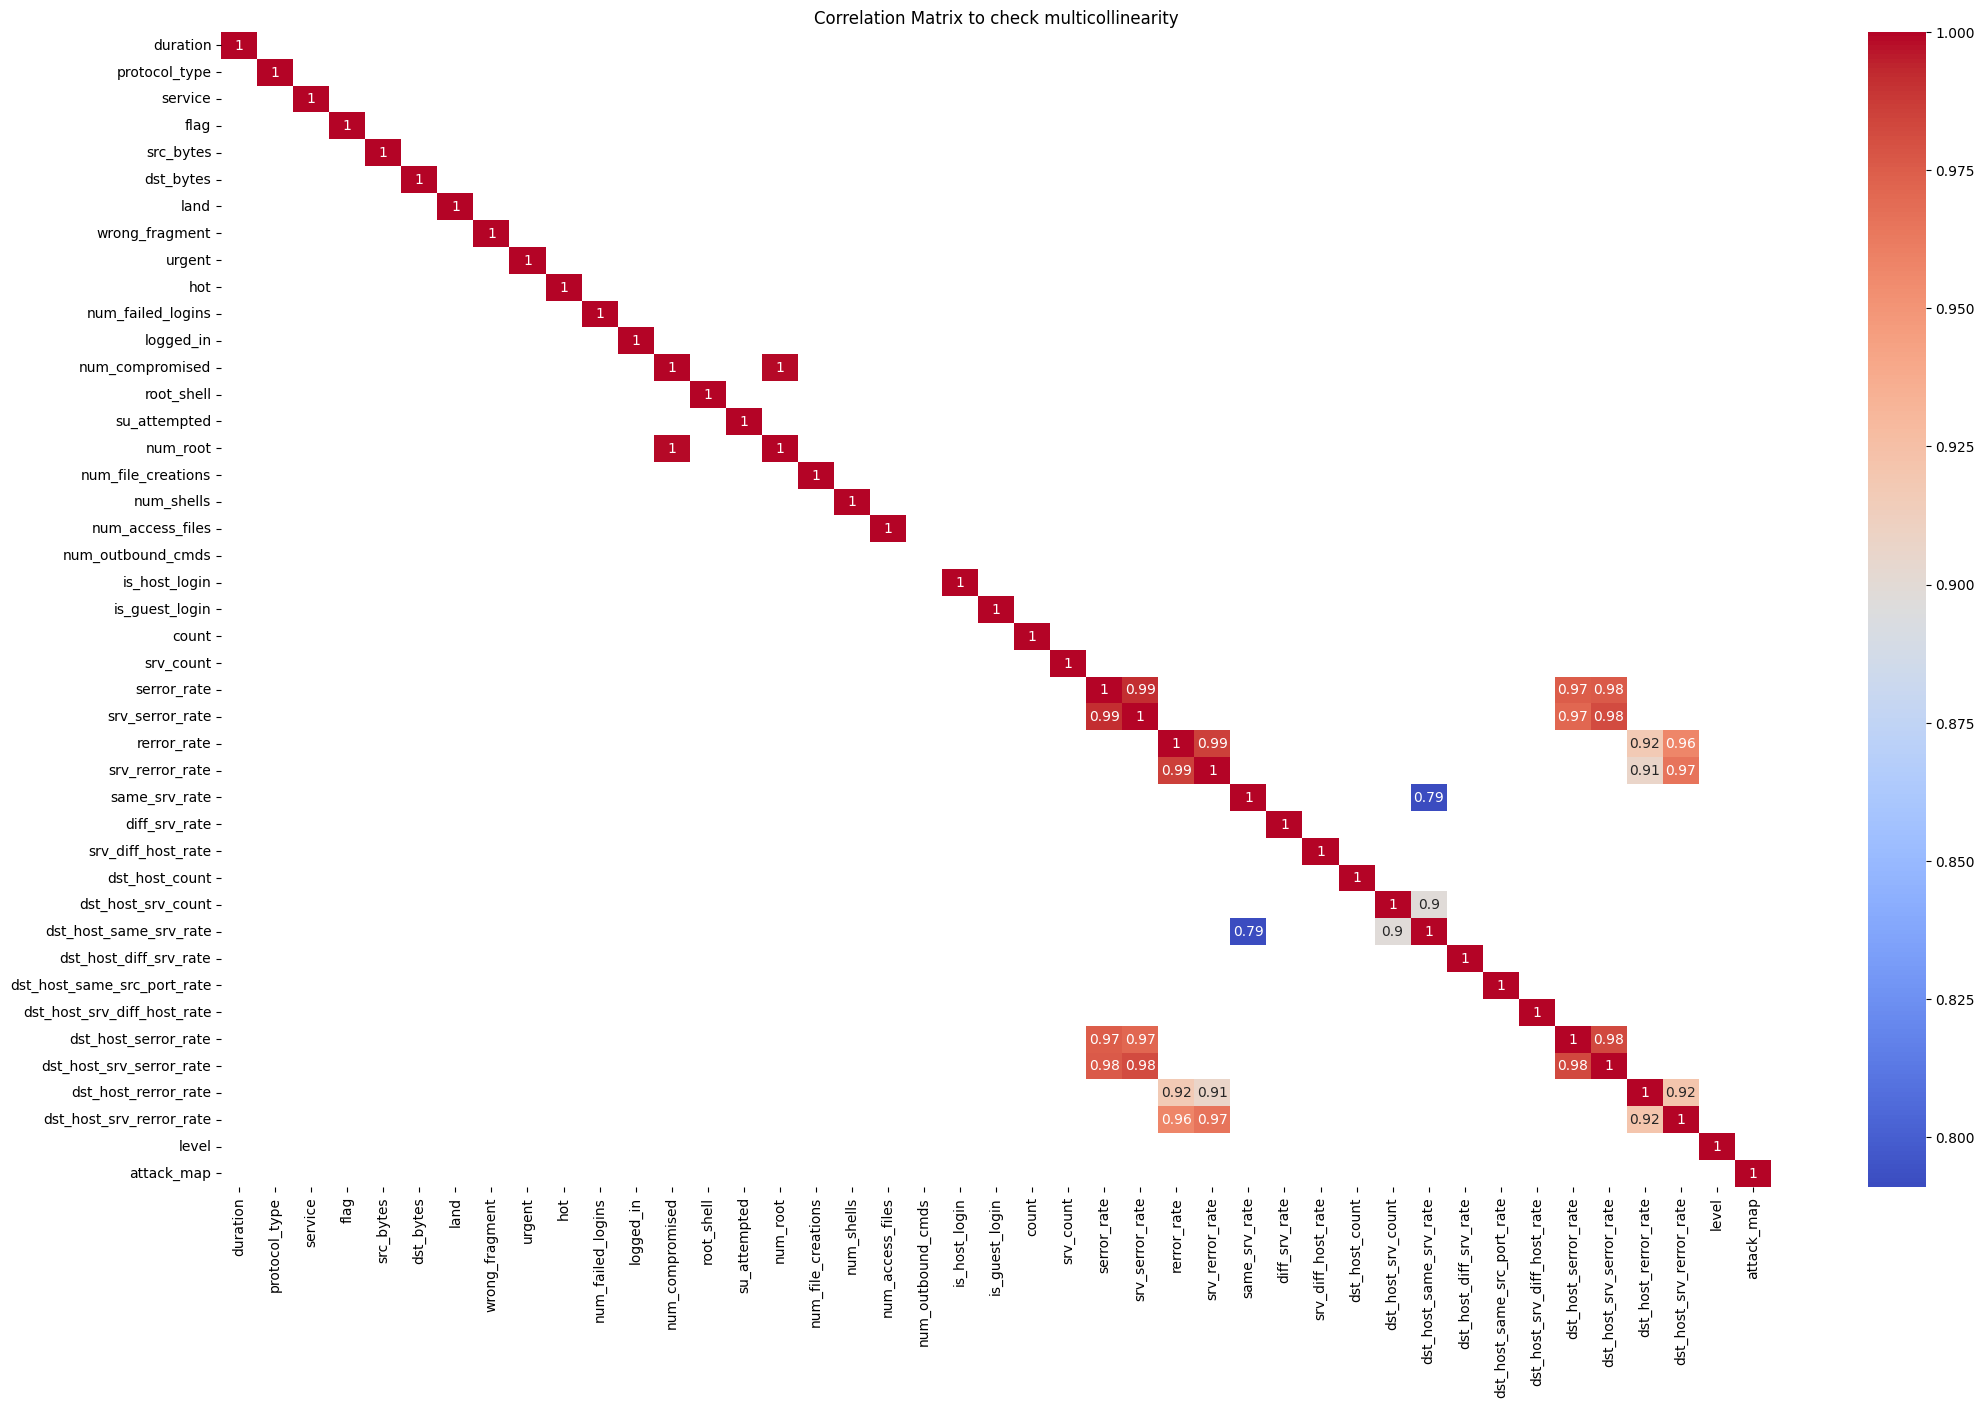

In [ ]:
import seaborn as sns
corr_matrix = df.corr()
high_corr = corr_matrix[(corr_matrix > 0.75) & (corr_matrix <= 1.0)]
plt.figure(figsize=(25,15))
sns.heatmap(high_corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix to check multicollinearity')
plt.show()

'is_guest_login'  ***holds***  'hot'  

'num_root'  ***holds***  'num_compromised'

'serror_rate'  ***holds***  'srv_serror_rate' , 'dst_host_serror_rate' and 'dst_host_srv_serror_rate'

'rerror_rate'  ***holds***  'srv_rerror_rate','dst_host_rerror_rate', 'dst_host_srv_rerror_rate'

'dst_host_srv_serror_rate'  ***holds***  'same_srv_rate' and 'dst_host_srv_count'

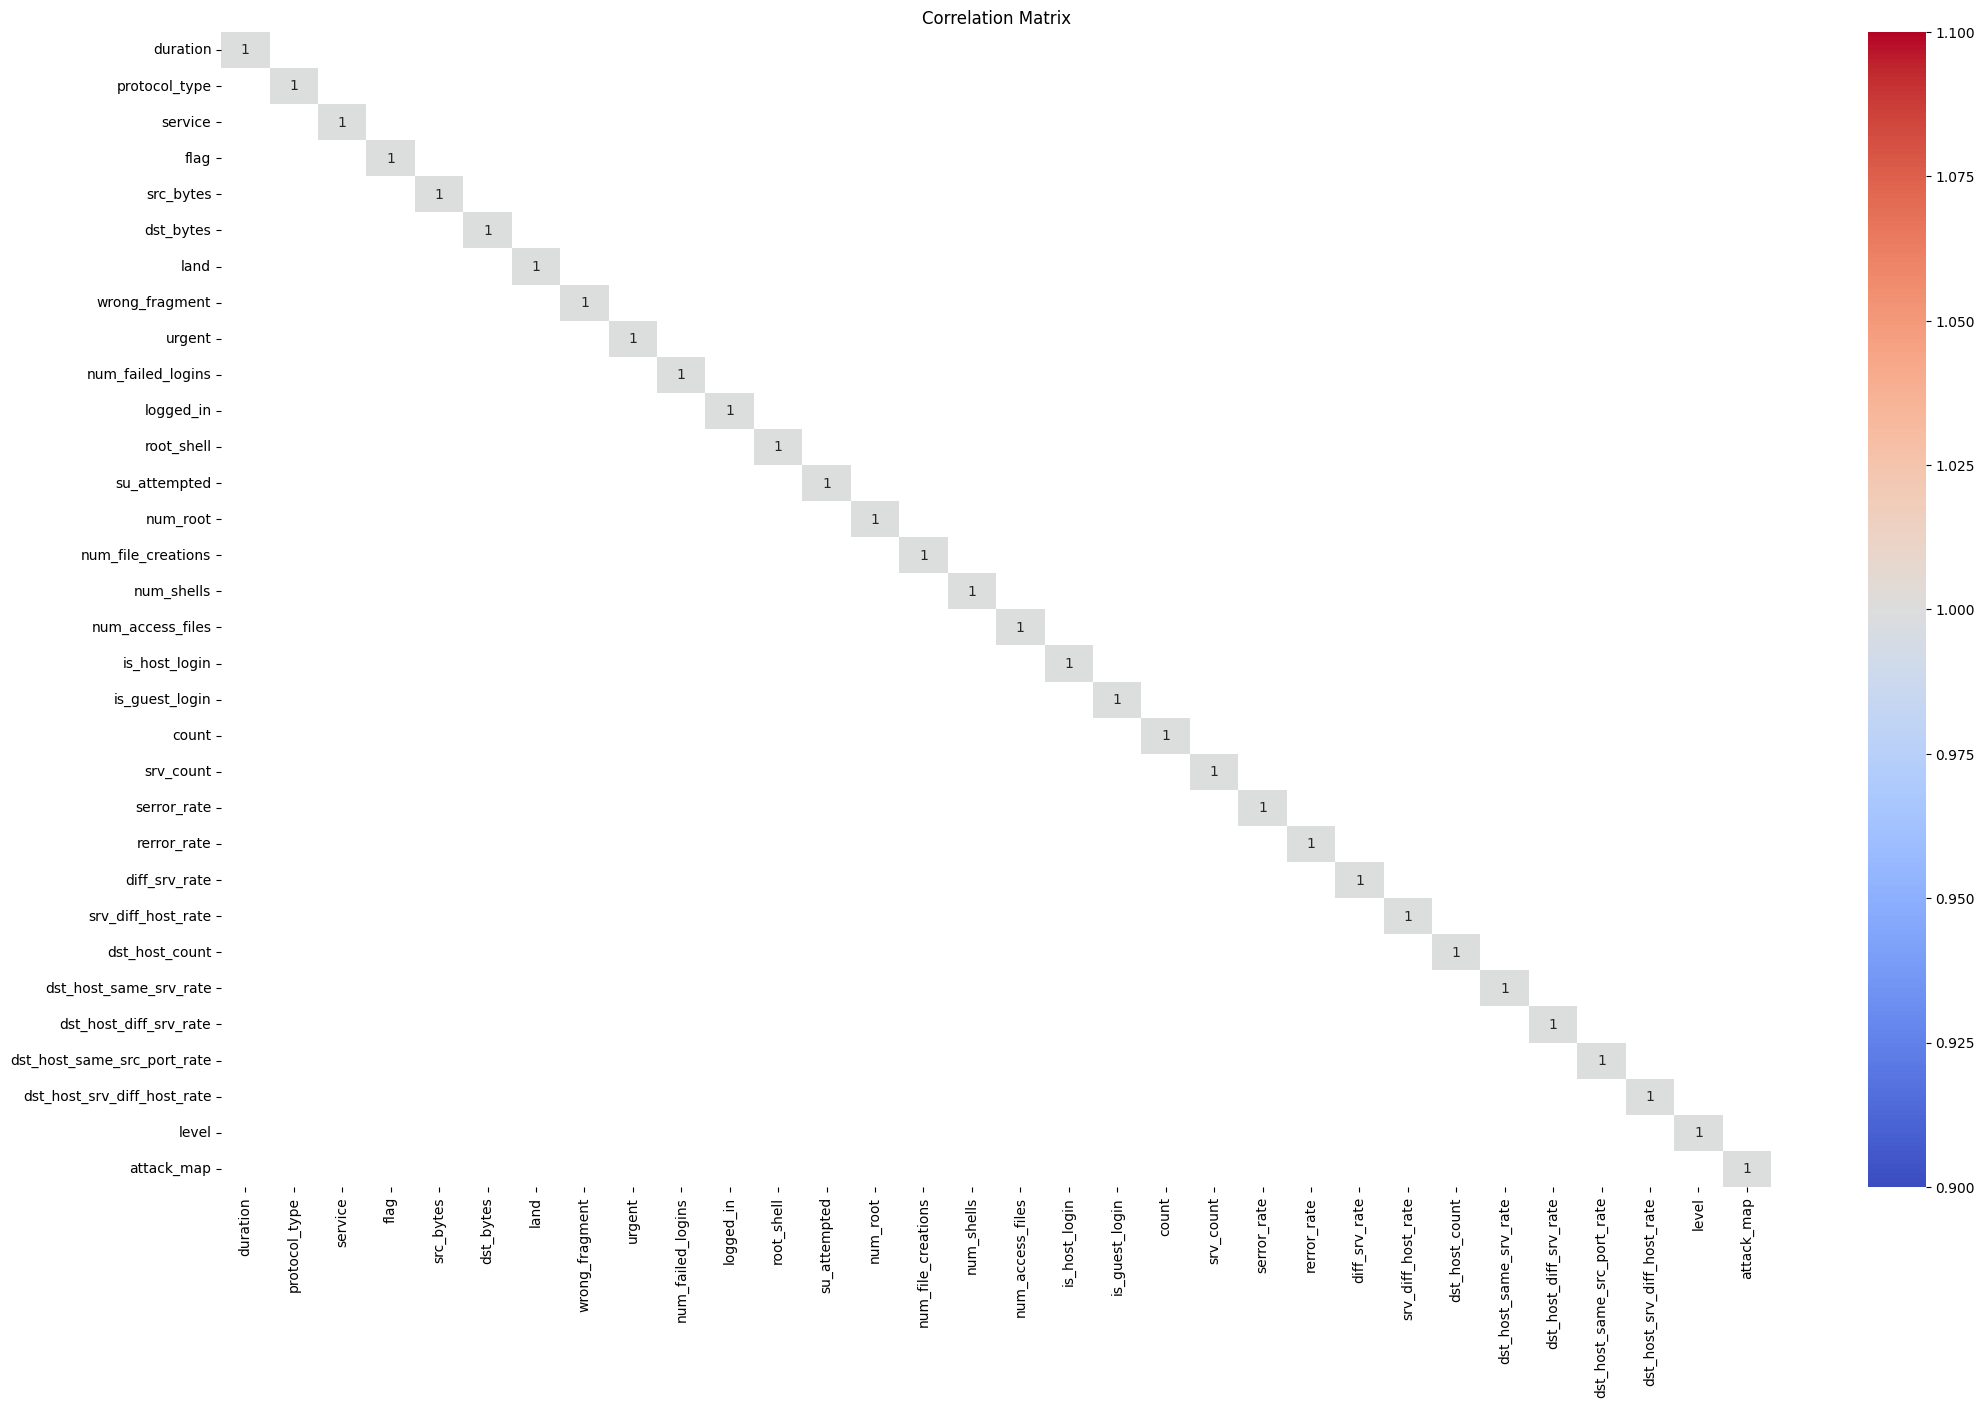

In [ ]:
df_new_extracted =df.drop(['num_outbound_cmds','hot','num_compromised','srv_serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate', 'srv_rerror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','same_srv_rate','dst_host_srv_count'], axis=1, inplace=False)

import seaborn as sns
corr_matrix1 = df_new_extracted.corr()
high_corr1 = corr_matrix1[(corr_matrix1 > 0.75) & (corr_matrix1 <= 1.0)]
plt.figure(figsize=(25,15))
sns.heatmap(high_corr1, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


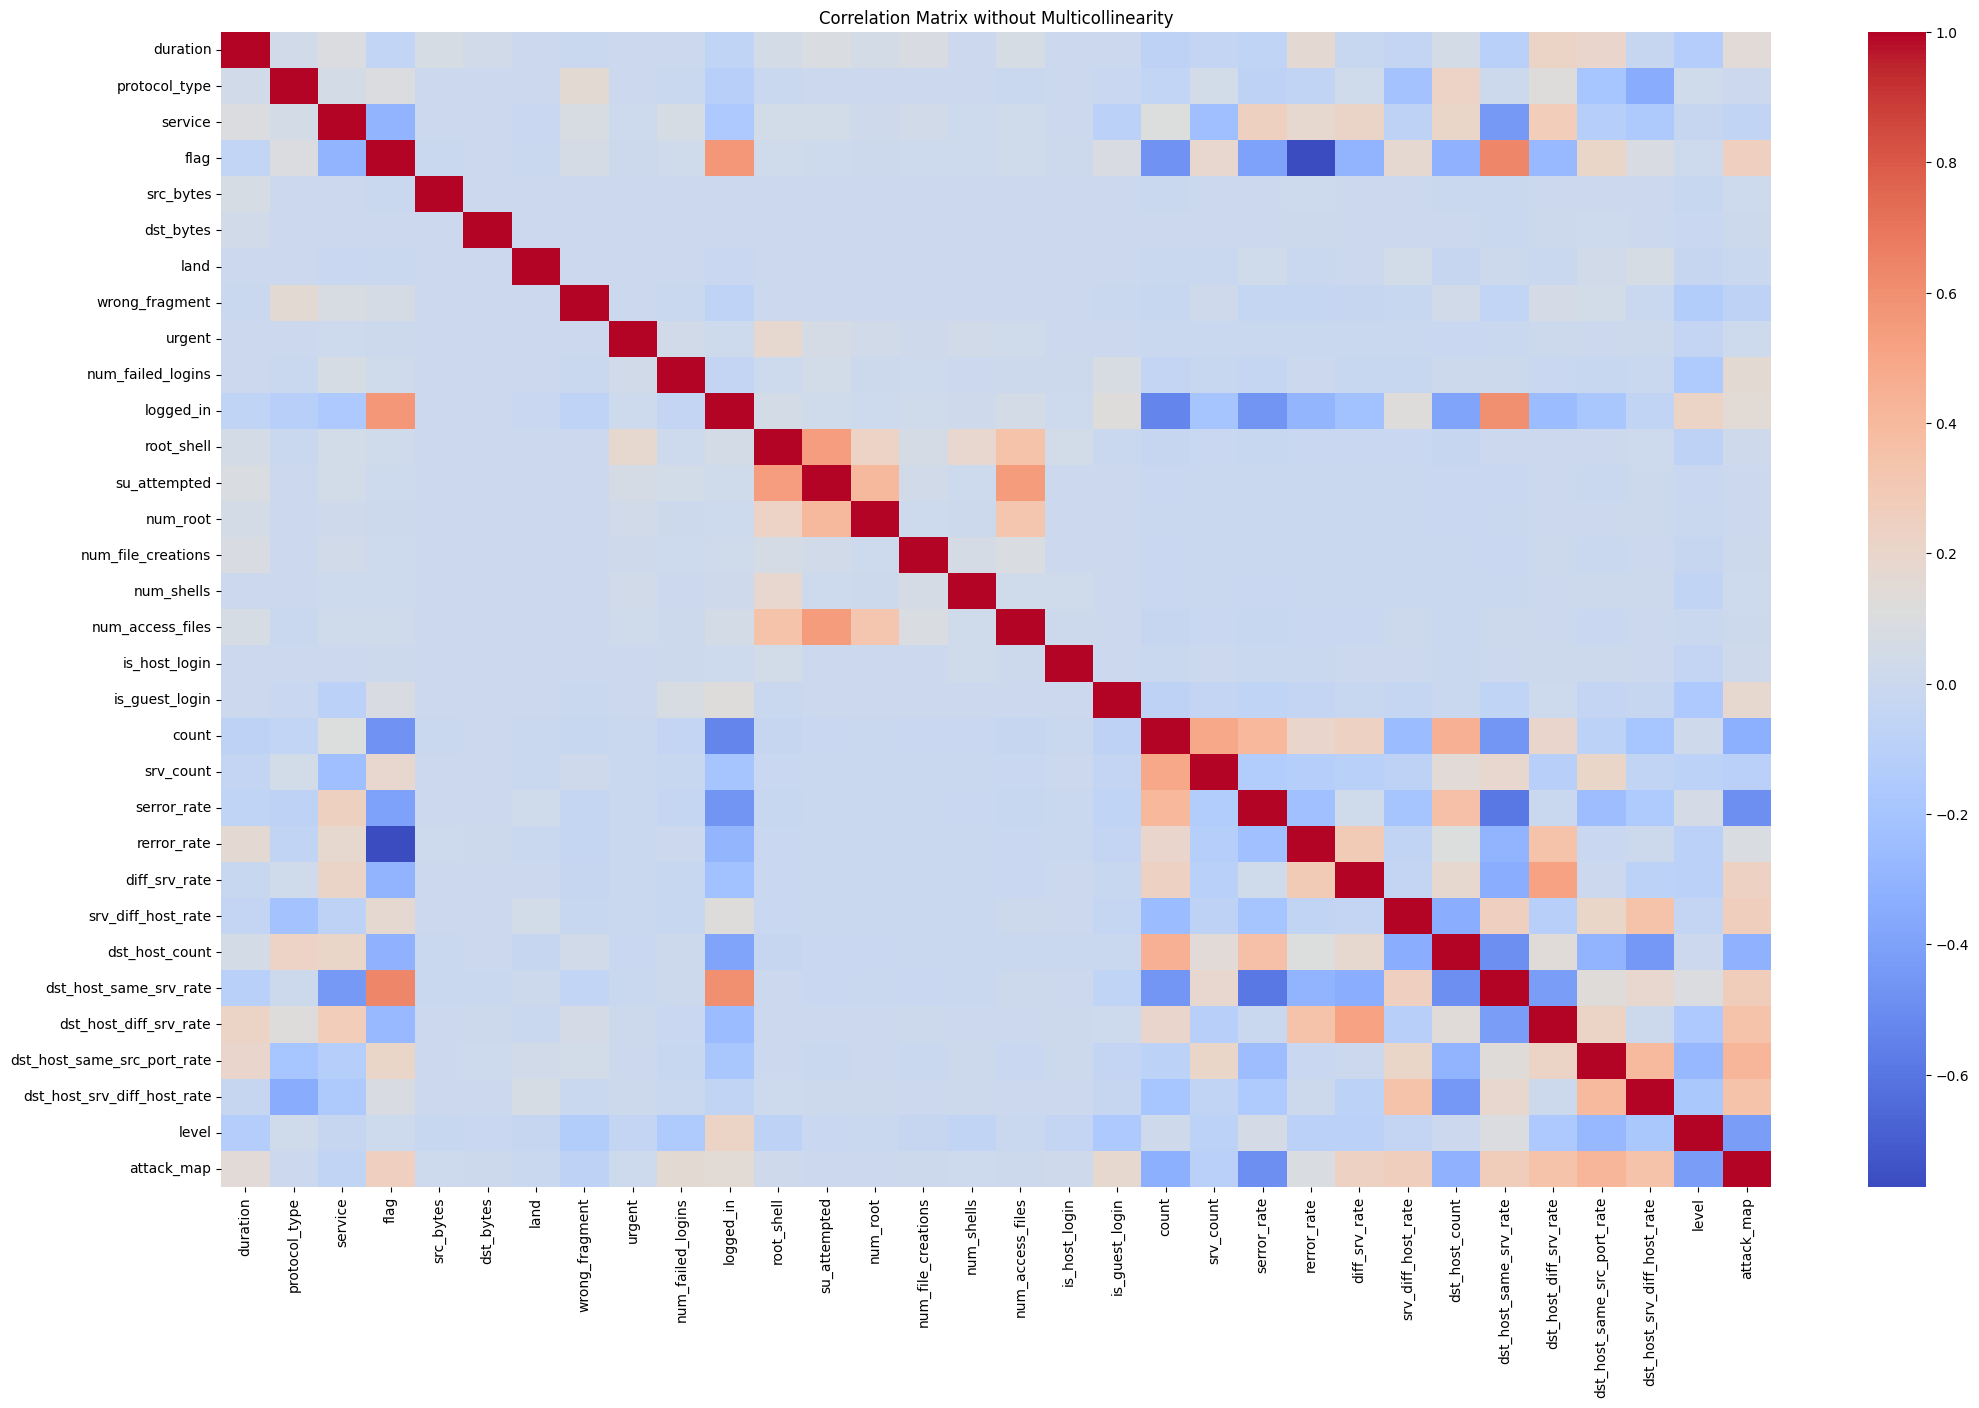

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(corr_matrix1, cmap='coolwarm')
plt.title('Correlation Matrix with Multicollinearity Reduction')
plt.show()

In [ ]:
features_extracted  = df_new_extracted.columns
df_orig = df_orig[features_extracted]
df_orig.shape

(148515, 32)

In [ ]:
df_orig.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,...,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,level,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.15,0.00,255,0.00,0.60,0.88,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.07,0.00,255,0.10,0.05,0.00,0.00,19,dos
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.0,0.00,0.00,30,1.00,0.00,0.03,0.04,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.0,0.00,0.09,255,1.00,0.00,0.00,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.06,0.00,255,0.07,0.07,0.00,0.00,21,dos


## Data Augmentation(Oversampling)

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('attack_map', axis=1)
y = df['attack_map']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

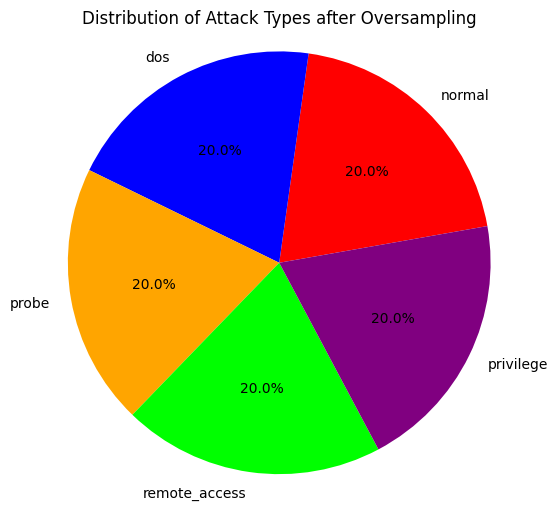

In [ ]:
# Create a mapping for attack types
attack_mapping = {
    0: 'dos',
    1: 'normal',
    2: 'privilege',
    3: 'probe',
    4: 'remote_access'
}

# Map the numerical attack labels back to string labels
y_resampled_str = y_resampled.map(attack_mapping)

plt.figure(figsize=(10, 6))
attack_count = y_resampled_str.value_counts()


# list of CSS color names
css_colors = ["red", "blue", "orange", "lime", "purple"]

# Create the pie chart with CSS colors
plt.figure(figsize=(6, 6))
plt.pie(
    attack_count,
    labels=attack_counts.index,
    autopct='%1.1f%%',
    startangle=10,
    colors=css_colors
)
plt.title('Distribution of Attack Types after Oversampling')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(386030, 42)
(386030,)


## *(Data spliting, Model Training and Testing is a future scope)*